In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='DejaVu Sans')

# Set the style to 'ggplot', which is popular for its simple and aesthetically pleasing visuals
plt.style.use('seaborn-whitegrid')
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams["axes.linewidth"]  = 1.5

# Set the default color cycle to a visually distinct set of colors
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

# Increase the default font size for readability
mpl.rcParams['font.size'] = 17

# Set a font family that is commonly available and readable
mpl.rcParams['font.family'] = 'DejaVu Sans'

# Set the figure size to a reasonable default
mpl.rcParams['figure.figsize'] = (8, 5)

# Use a tight layout to make better use of space
mpl.rcParams['figure.autolayout'] = True

# Set the dpi (dots per inch) higher for better quality images
mpl.rcParams['figure.dpi'] = 100

# Increase the default size of plot elements (lines, markers, etc.)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 7

# Adjust the appearance of legends
mpl.rcParams['legend.frameon'] = True  # Enable frame
mpl.rcParams['legend.framealpha'] = 0.7  # Set frame transparency
mpl.rcParams['legend.fancybox'] = True  # Enable rounded corners

# Adjust the axes
mpl.rcParams['axes.labelsize'] = 'large'  # Increase the size of axis labels
mpl.rcParams['axes.titlesize'] = 'x-large'  # Increase the size of the axis title
mpl.rcParams['axes.grid'] = True  # Enable grid for better readability

# Adjust tick marks for both axes
mpl.rcParams['xtick.labelsize'] = 'medium'
mpl.rcParams['ytick.labelsize'] = 'medium'

# Save settings for high-quality outputs
mpl.rcParams['savefig.dpi'] = 300  # High dpi for better image quality
mpl.rcParams['savefig.format'] = 'png'  # Set default save format to PNG

C:\Users\Zhen Guo\AppData\Local\Temp\ipykernel_20548\3032602670.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
import re

def extract_data_correctly(file_path):
    
    with open(file_path, 'r') as file:
        file_content = file.readlines()
    
    data = []
    current_data = {}

    for line in file_content:
        if '<<model>>' in line:
            if current_data:  # If there is already data collected, append it to the list
                data.append(current_data)
                current_data = {}  # Reset for the next data set

            # Extracting model and test data
            model_match = re.search(r'<<model>>: (.*?) <<', line)
            test_data_match = re.search(r'<<test data>>: (.+?)\n', line)
            if model_match:
                current_data['model'] = model_match.group(1).replace("-v0.1", "").replace("-hf", "").replace("7B", "7b")
            if test_data_match:
                current_data['test_data'] = test_data_match.group(1)

        elif 'Overall Endpoint Match Accuracy:' in line:
            endpoint_accuracy_match = re.search(r'Overall Endpoint Match Accuracy: (.+?)\n', line)
            if endpoint_accuracy_match:
                current_data['endpoint_accuracy'] = endpoint_accuracy_match.group(1)

        elif 'Overall API Call Match Accuracy:' in line:
            api_call_accuracy_match = re.search(r'Overall API Call Match Accuracy: (.+?)\n', line)
            if api_call_accuracy_match:
                current_data['api_call_accuracy'] = api_call_accuracy_match.group(1)

    # Add the last data set if it exists
    if current_data:
        data.append(current_data)

    return data

extracted_data = extract_data_correctly('model_battle.txt')
extracted_data

[{'model': 'Mistral-7b',
  'test_data': 'total_testing_cleaned_python_level_1.json.json',
  'endpoint_accuracy': '0.405',
  'api_call_accuracy': '0.285'},
 {'model': 'Mistral-7b',
  'test_data': 'total_testing_cleaned_python_level_2.json.json',
  'endpoint_accuracy': '0.240',
  'api_call_accuracy': '0.183'},
 {'model': 'Mistral-7b',
  'test_data': 'total_testing_cleaned_python_level_3.json.json',
  'endpoint_accuracy': '0.152',
  'api_call_accuracy': '0.121'},
 {'model': 'Mistral-7b',
  'test_data': 'total_testing_cleaned_python_level_1_retrieval_IC_3.json.json',
  'endpoint_accuracy': '0.641',
  'api_call_accuracy': '0.554'},
 {'model': 'Mistral-7b',
  'test_data': 'total_testing_cleaned_python_level_2_retrieval_IC_3.json.json',
  'endpoint_accuracy': '0.491',
  'api_call_accuracy': '0.428'},
 {'model': 'Mistral-7b',
  'test_data': 'total_testing_cleaned_python_level_3_retrieval_IC_3.json.json',
  'endpoint_accuracy': '0.508',
  'api_call_accuracy': '0.425'},
 {'model': 'CodeLlama-7b'

In [3]:
import numpy as np

# Function to safely extract accuracy values
def safe_extract_accuracy(data_list, key):
    return [float(d[key]) if key in d else None for d in data_list]

# Function to plot the bar charts
def plot_bar_chart(data, title, ylabel, y_lim=0.5):
    n_models = len(models)
    n_levels = len(data)
    bar_width = 0.2
    opacity = 0.8

    fig, ax = plt.subplots()

    for i, (level, accuracies) in enumerate(data.items()):
        bar_positions = np.arange(n_models) + i * bar_width
        filtered_accuracies = [acc for acc in accuracies if acc is not None]
        filtered_positions = [pos for acc, pos in zip(accuracies, bar_positions) if acc is not None]

        ax.bar(filtered_positions, filtered_accuracies, bar_width, alpha=opacity, label=level)

    ax.set_ylabel(ylabel, fontsize=16)
    #ax.set_title(title)
    ax.set_xticks(np.arange(n_models) + bar_width * (n_levels - 1) / 2)
    ax.set_xticklabels(models, fontsize=16)
    ax.legend()
    plt.ylim(0, y_lim)
    plt.tight_layout()
    plt.show()

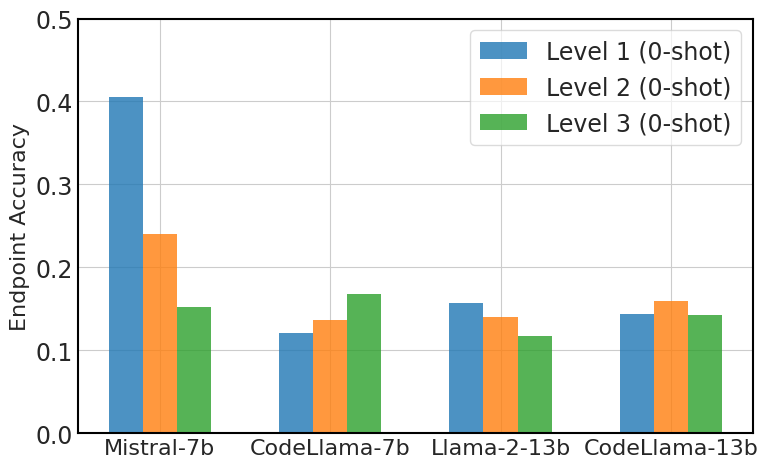

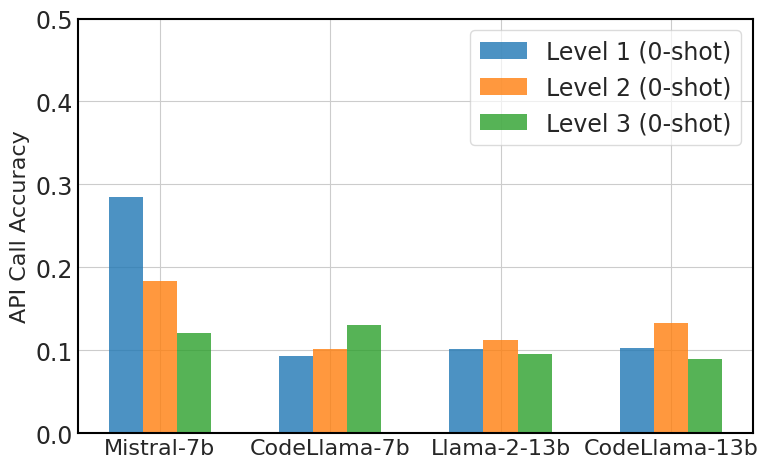

In [4]:
# Filter and organize the data
filtered_data = [d for d in extracted_data if 'total_testing_cleaned_python_level_' in d['test_data'] and 'retrieval_IC_3.json.json' not in d['test_data']]
level_1_data = [d for d in filtered_data if 'level_1' in d['test_data']]
level_2_data = [d for d in filtered_data if 'level_2' in d['test_data']]
level_3_data = [d for d in filtered_data if 'level_3' in d['test_data']]
models = [d['model'] for d in level_1_data]  # Assuming models are the same across levels

# Extracting accuracies
endpoint_accuracies = {
    'Level 1 (0-shot)': safe_extract_accuracy(level_1_data, 'endpoint_accuracy'),
    'Level 2 (0-shot)': safe_extract_accuracy(level_2_data, 'endpoint_accuracy'),
    'Level 3 (0-shot)': safe_extract_accuracy(level_3_data, 'endpoint_accuracy'),
}

api_call_accuracies = {
    'Level 1 (0-shot)': safe_extract_accuracy(level_1_data, 'api_call_accuracy'),
    'Level 2 (0-shot)': safe_extract_accuracy(level_2_data, 'api_call_accuracy'),
    'Level 3 (0-shot)': safe_extract_accuracy(level_3_data, 'api_call_accuracy'),
}

# Plotting the bar charts
plot_bar_chart(endpoint_accuracies, 'Endpoint Match Accuracy per Model and Level', 'Endpoint Accuracy')
plot_bar_chart(api_call_accuracies, 'API Call Match Accuracy per Model and Level', 'API Call Accuracy')

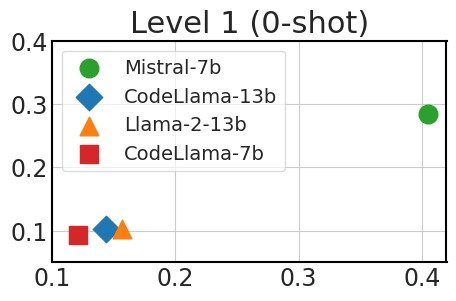

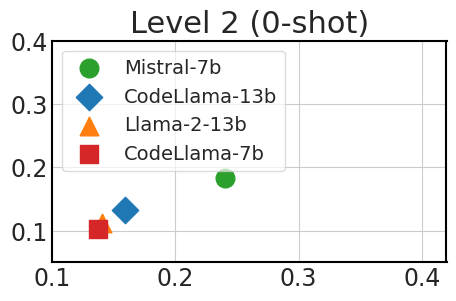

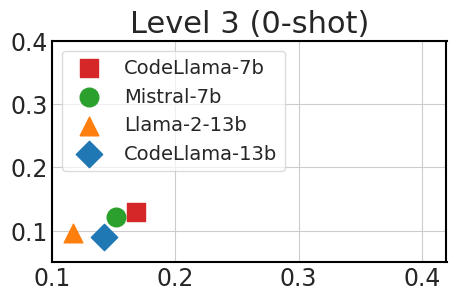

In [5]:
def plot_scatter_for_each_level(data, title_prefix):
    # Define a mapping of model names to markers and colors
    model_markers = {
        'gpt-3.5-1106': {'marker': '*', 'color': '#9467bd'},  # Muted blue
        'gpt-4-1106': {'marker': '>', 'color': '#8c564b'},   # Safety orange
        'Mistral-7b': {'marker': 'o', 'color': '#2ca02c'},   # Cooked asparagus green
        'CodeLlama-7b': {'marker': 's', 'color': '#d62728'}, # Brick red
        'CodeLlama-13b': {'marker': 'D', 'color': '#1f77b4'},# Muted purple
        'Llama-2-13b': {'marker': '^', 'color': '#ff7f0e'},  # Chestnut brown
        # Add other models with their corresponding markers and colors here
    }
    
    # Determine the global minimum and maximum values for x and y axes
    all_accuracies = [acc for level_data in data.values() for acc in level_data if 'endpoint_accuracy' in acc and 'api_call_accuracy' in acc]
    all_endpoint_acc = [float(acc['endpoint_accuracy']) for acc in all_accuracies]
    all_api_call_acc = [float(acc['api_call_accuracy']) for acc in all_accuracies]
    x_min, x_max = min(all_endpoint_acc), max(all_endpoint_acc)
    y_min, y_max = min(all_api_call_acc), max(all_api_call_acc)

    for level, accuracies in data.items():
        # Filter out data points with both accuracies
        filtered_accuracies = [acc for acc in accuracies if 'endpoint_accuracy' in acc and 'api_call_accuracy' in acc]
        
        # Add additional data for specific levels
        if level == "Level 3 (3-shot retrieve)":
            filtered_accuracies.append({'model': 'gpt-3.5-1106', 'endpoint_accuracy': '0.472', 'api_call_accuracy': '0.395'})
            filtered_accuracies.append({'model': 'gpt-4-1106', 'endpoint_accuracy': '0.535', 'api_call_accuracy': '0.443'})

        # Sort the data by API call accuracy
        sorted_accuracies = sorted(filtered_accuracies, key=lambda x: float(x['api_call_accuracy']), reverse=True)
        
        # Create a scatter plot for the current level
        fig, ax = plt.subplots(figsize=(6.5 * 0.75, 4.75 * 0.7))
        
        for acc in sorted_accuracies:
            endpoint_acc = float(acc['endpoint_accuracy'])
            api_call_acc = float(acc['api_call_accuracy'])
            model = acc['model']

            # Use the specified marker and color for the model, or default ones if the model is not in the mapping
            marker_info = model_markers.get(model, {'marker': 'o', 'color': 'black'})
            marker = marker_info['marker']
            color = marker_info['color']

            ax.scatter(endpoint_acc, api_call_acc, marker=marker, color=color, s=180, label=model)
        
        # Set the same axis limits for all plots
        ax.set_xlim(0.1, 0.42)
        ax.set_ylim(0.05, 0.4)

        ax.set_title(f'{level}', fontsize=22)
        ax.legend(fontsize=14, loc='upper left')  
        plt.show()

# Organize data by level
level_data = {
    'Level 1 (0-shot)': level_1_data,
    'Level 2 (0-shot)': level_2_data,
    'Level 3 (0-shot)': level_3_data
}

# Plotting the scatter plots for each level separately
plot_scatter_for_each_level(level_data, 'Model Performance (Endpoint vs API Call Accuracy) -')

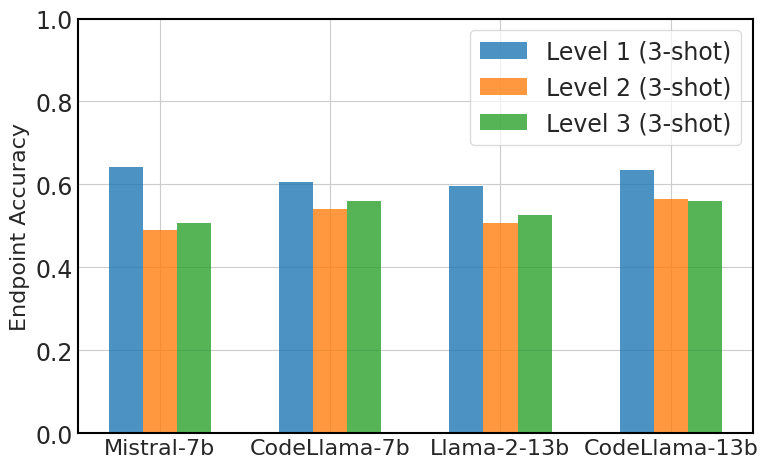

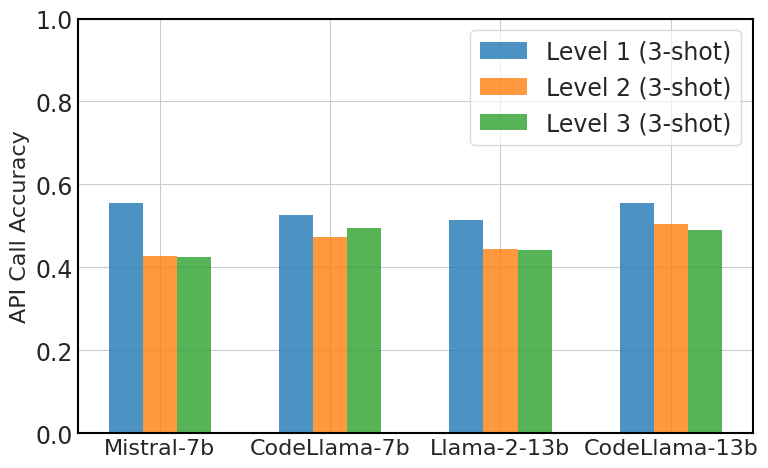

In [6]:
# Filter and organize the data
filtered_data = [d for d in extracted_data if 'retrieval_IC_3.json.json' in d['test_data']]
level_1_data = [d for d in filtered_data if 'level_1' in d['test_data']]
level_2_data = [d for d in filtered_data if 'level_2' in d['test_data']]
level_3_data = [d for d in filtered_data if 'level_3' in d['test_data']]
models = [d['model'] for d in level_1_data]  # Assuming models are the same across levels

# Extracting accuracies
endpoint_accuracies = {
    'Level 1 (3-shot)': safe_extract_accuracy(level_1_data, 'endpoint_accuracy'),
    'Level 2 (3-shot)': safe_extract_accuracy(level_2_data, 'endpoint_accuracy'),
    'Level 3 (3-shot)': safe_extract_accuracy(level_3_data, 'endpoint_accuracy'),
}

api_call_accuracies = {
    'Level 1 (3-shot)': safe_extract_accuracy(level_1_data, 'api_call_accuracy'),
    'Level 2 (3-shot)': safe_extract_accuracy(level_2_data, 'api_call_accuracy'),
    'Level 3 (3-shot)': safe_extract_accuracy(level_3_data, 'api_call_accuracy'),
}

# Plotting the bar charts
plot_bar_chart(endpoint_accuracies, 'Endpoint Match Accuracy per Model and Level', 'Endpoint Accuracy', 1)
plot_bar_chart(api_call_accuracies, 'API Call Match Accuracy per Model and Level', 'API Call Accuracy', 1)

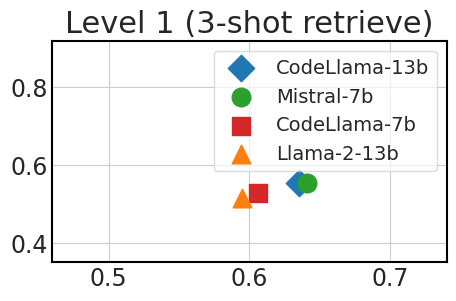

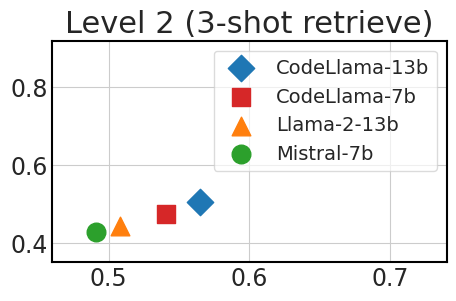

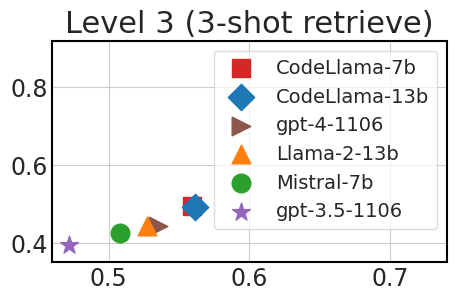

In [7]:
def plot_scatter_for_each_level(data, title_prefix):
    # Define a mapping of model names to markers and colors
    model_markers = {
        'gpt-3.5-1106': {'marker': '*', 'color': '#9467bd'},  # Muted blue
        'gpt-4-1106': {'marker': '>', 'color': '#8c564b'},   # Safety orange
        'Mistral-7b': {'marker': 'o', 'color': '#2ca02c'},   # Cooked asparagus green
        'CodeLlama-7b': {'marker': 's', 'color': '#d62728'}, # Brick red
        'CodeLlama-13b': {'marker': 'D', 'color': '#1f77b4'},# Muted purple
        'Llama-2-13b': {'marker': '^', 'color': '#ff7f0e'},  # Chestnut brown
        # Add other models with their corresponding markers and colors here
    }

    for level, accuracies in data.items():
        # Filter out data points with both accuracies
        filtered_accuracies = [acc for acc in accuracies if 'endpoint_accuracy' in acc and 'api_call_accuracy' in acc]
        
        # Add additional data for specific levels
        if level == "Level 3 (3-shot retrieve)":
            filtered_accuracies.append({'model': 'gpt-3.5-1106', 'endpoint_accuracy': '0.472', 'api_call_accuracy': '0.395'})
            filtered_accuracies.append({'model': 'gpt-4-1106', 'endpoint_accuracy': '0.535', 'api_call_accuracy': '0.443'})

        # Sort the data by API call accuracy
        sorted_accuracies = sorted(filtered_accuracies, key=lambda x: float(x['api_call_accuracy']), reverse=True)
        
        # Create a scatter plot for the current level
        fig, ax = plt.subplots(figsize=(6.5 * 0.75, 4.75 * 0.7))
        
        for acc in sorted_accuracies:
            endpoint_acc = float(acc['endpoint_accuracy'])
            api_call_acc = float(acc['api_call_accuracy'])
            model = acc['model']

            # Use the specified marker and color for the model, or default ones if the model is not in the mapping
            marker_info = model_markers.get(model, {'marker': 'o', 'color': 'black'})
            marker = marker_info['marker']
            color = marker_info['color']

            ax.scatter(endpoint_acc, api_call_acc, marker=marker, color=color, s=180, label=model)
        
        # Set the same axis limits for all plots
        ax.set_xlim(0.46, 0.74)
        ax.set_ylim(0.35, 0.92)
        ax.set_title(f'{level}', fontsize=22)
        ax.legend(fontsize=14)  
        plt.show()

# Organize data by level
level_data = {
    'Level 1 (3-shot retrieve)': level_1_data,
    'Level 2 (3-shot retrieve)': level_2_data,
    'Level 3 (3-shot retrieve)': level_3_data
}

# Plotting the scatter plots for each level separately
plot_scatter_for_each_level(level_data, 'Model Performance (Endpoint vs API Call Accuracy) -')